# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience </a>

In [4]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(palette='Set2')

## Задача 1
### Распределение Стьюдента


В `scipy.stats` распределение Стьюдента задается объектом `t` с параметрами:
 * `loc` и `scale` параметры распределения так же как и у нормального распределение
 * `df` число степеней свободы

Все остальные методы стандартные. Например, генерации выборки из распределения $T_{50}$ будет выглядеть так:


In [5]:
sps.t(df=50).rvs(4)

array([-1.56370078, -1.78315062,  0.02736506, -0.7255974 ])

Постройте на одном графике плотности распределения Стьюдента и нормального.


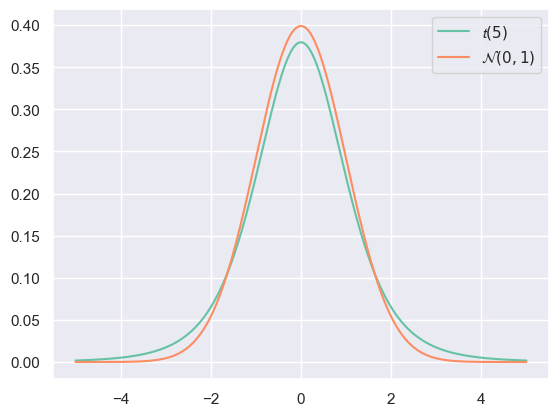

In [7]:
df = 5
x_ax = np.linspace(-5, 5, 1000)

plt.plot(x_ax, sps.t.pdf(x_ax, df=df), label=r"$\mathcal{t}(5)$")
plt.plot(x_ax, sps.norm.pdf(x_ax), label=r"$\mathcal{N}(0, 1)$")

plt.legend()
plt.show()

Что вы можете сказать о скорости убывания "хвостов" данных распределений? Повлияет ли это на значения соответствующих квантилей?

**Ответ:** Нормальное распределение затухает быстрее, конечно это повлияет на значение квантилей, которые зависят от площади под графиком плотности

### Квантили распределения Стьюдента

Для подсчета теоретических значений квантилей в модуле `scipy.stats` есть метод `.ppf`. На вход принимает параметр `alpha` - значение квантиля, а так же все параметры выбранного распределения.



In [8]:
sps.norm(loc=0, scale=1).ppf(0.05)

-1.6448536269514729

Для распределения Стьюдента нужно указать еще число степеней свобод.

In [9]:
sps.t(loc=0, scale=1, df=5).ppf(0.05)

-2.0150483726691575

Как мы видим, значения квантилей довольно сильно различаются. 

Возьмите `alpha` равное 95% и постройте график значений квантилей распределения стьюдента $T_{n-1,(1+\alpha)/2}$ от его степеней свобод. Так же нанесите на график значение квантиля нормального распределения $z_{(1+\alpha)/2}$

*Указание*: рассмотрите значения степеней свобод от 1 до 50.

In [12]:
alpha = 0.95
dfs =  np.arange(1, 50) # массив степеней свобод

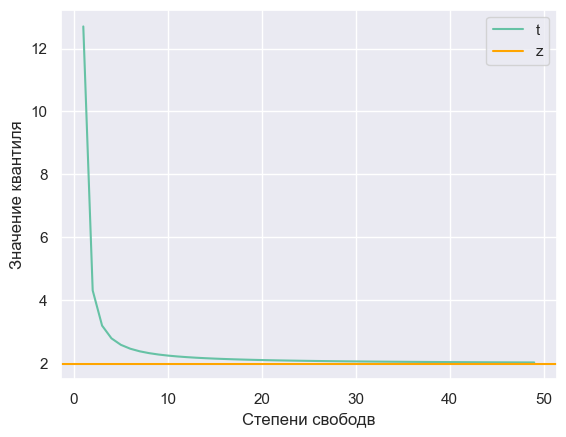

In [15]:
plt.plot(dfs, [sps.t.ppf((1 + alpha) / 2, df=df) for df in dfs], label="t")
plt.axhline(sps.norm.ppf((1 + alpha) / 2), color='orange', label="z")
plt.xlabel("Степени свободв")
plt.ylabel("Значение квантиля")

plt.legend()
plt.show()

Как изменяется поведение значения квантилей t распределения, есть ли у него какой-то предел?

**Ответ:** Да, они стремятся к квантилю Нормального распределения. Уже можно выдвигать гипотезу, что распределение Стьюдента сходится в пределе к нормальному

### ДИ в нормальной модели
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить: 
 * асимптотический доверительный интервал при помощи центральной предельной теоремы;
 * точный неасимптотический при помощи распределений хи-квадрат, Стьюдента.


Вывод этих интервалов был разобран на лекции. Выпишите только ответы.

Асимптотический доверительный интервал: 

Точный доверительный интервал: 



Постройте доверительные интервалы для параметра сдвига стандартного нормального распределения. Нужно построить доверительные интервалы обоих рассмотренных выше типов. Запишите их в виде таблицы.

*Указание*: рассмотрите длину выборки около 20-30.


In [16]:
sample_size = 30
alpha = 0.95
sample = np.random.normal(size=sample_size)  # выборка
z = sps.norm.ppf((1 + alpha) / 2)
t = sps.t.ppf((1 + alpha) / 2, df=sample_size - 1)

asymptotic_ci = (
    sample.mean() - z * np.std(sample, ddof=1) / np.sqrt(sample_size),
    sample.mean() + z * np.std(sample, ddof=1) / np.sqrt(sample_size)
)  # асимптотические ДИ

precise_ci = (
    sample.mean() - t * np.std(sample, ddof=1) / np.sqrt(sample_size),
    sample.mean() + t * np.std(sample, ddof=1) / np.sqrt(sample_size)
)  # точные ДИ

print(f"Асимптотический ДИ: ({asymptotic_ci[0]}, {asymptotic_ci[1]})")
print(f"Точный ДИ: ({precise_ci[0]}, {precise_ci[1]})")

Асимптотический ДИ: (-0.15221524549369175, 0.4909780049559715)
Точный ДИ: (-0.16620588406953624, 0.5049686435318159)


Сравните полученные значения для доверительных интервалов.

**Ответ**: 

Реализуйте функции построения этих интервалов по выборке. Функции уже задокументированы.

Интервалы считайте по префиксам. Циклы использовать **запрещено**. Для подсчета среднего по префиксам используйте функцию `np.cumsum`.

In [17]:
def calculate_asymptotic_confidence_intervals(sample, alpha=0.95):
    """
    Функция для вычисления асимптотического доверительного интервала
        параметра сдвига для всех подвыборок выборки
    param sample: выборка,
    param alpha: уровень доверия

    return: асимптотический доверительный интервал
    """

    n = len(sample)
    ns = np.arange(1, n + 1)
    z = sps.norm.ppf((1 + alpha) / 2)

    mu = np.cumsum(sample) / ns
    std = np.sqrt(np.cumsum((sample - mu[:n]) ** 2) / ns)

    return np.column_stack((mu - z * std / np.sqrt(ns), mu + z * std / np.sqrt(ns)))


def calculate_confidence_intervals(sample, alpha=0.95):
    """
    Функция для вычисления неасимптотического доверительного интервала
        параметра сдвига для всех подвыборок выборки
    param sample: выборка,
    param alpha: уровень доверия

    return: неасимптотический доверительный интервал
    """

    n = len(sample)
    ns = np.arange(1, n + 1)
    t = sps.t.ppf((1 + alpha) / 2, df=ns - 1)

    mu = np.cumsum(sample) / ns
    std = np.sqrt(np.cumsum((sample - mu[:n]) ** 2) / ns)
    
    return np.column_stack(( mu - t * std / np.sqrt(ns), mu + t * std / np.sqrt(ns)))

Сгенерируйте выборку из нормального распределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Проследите за тем, чтобы было видно, как соотносятся размеры интервалов. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассмотрите длину выборки около 20-30.

Чтобы не плодить код, допишите следующую функцию (см. ниже). При выборе стиля графика помните, что если изображаются лишь точки и линии, то лучше использовать серый фон, а если присутствуют закрашенные области, то предпочтительнее белый. Графики первого типа еще называют "легкими", а второго — "тяжелыми".

*Подсказка:* вам может пригодиться функция `plt.fill_between`.


In [32]:
def draw_confidence_interval(
    left, right, estimation=None, sample=None,
    ylim=(-10, 10), color_estimation='#FF3300', color_interval='#00CC66',
    color_sample='#0066FF', label_estimation='Оценка',
    sample_label='Семпл', interval_label=None
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.

    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    '''

    time = np.arange(len(left)) + 1

    assert len(time) == len(right)

    if sample is not None:
        plt.plot(time, sample, color=color_sample, label=sample_label, alpha=0.5)

    if estimation is not None:
        plt.plot(time, estimation, color=color_estimation, label=label_estimation)

    plt.fill_between(time, left, right, color=color_interval, alpha=0.3, label=interval_label)
    plt.legend(fontsize=16)
    plt.ylim(ylim)
    plt.xlabel('Размер выборки')
    plt.title('Зависимость значений \ доверительного интервала от размера выборки')
    plt.grid()
    plt.show()

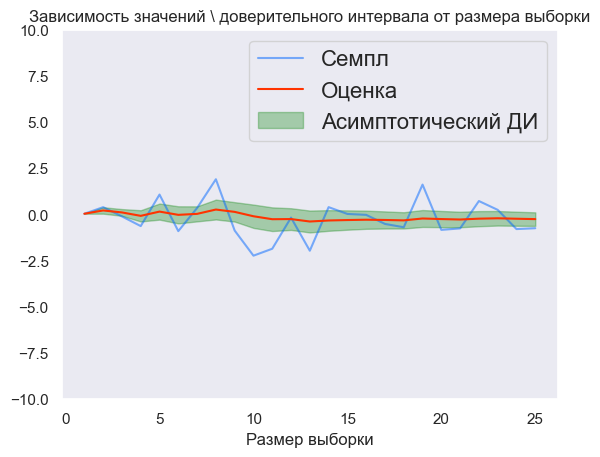

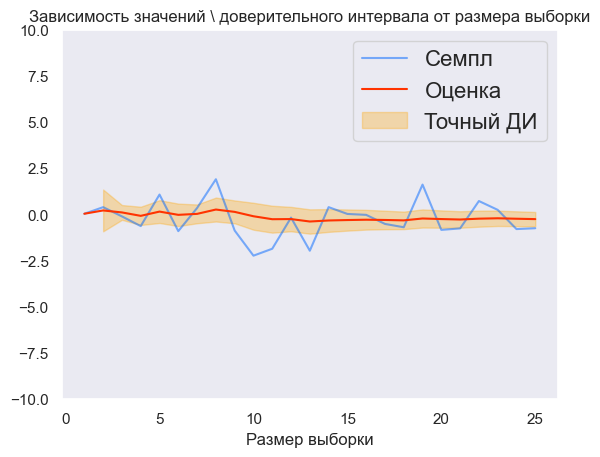

In [33]:
sample_size = 25
sample = np.random.normal(size=sample_size)

asymptotic_ci = calculate_asymptotic_confidence_intervals(sample, alpha=0.95)
precise_ci = calculate_confidence_intervals(sample, alpha=0.95)

draw_confidence_interval(
    left=asymptotic_ci[:, 0],
    right=asymptotic_ci[:, 1],
    estimation=np.cumsum(sample) / np.arange(1, sample_size + 1),
    sample=sample,
    color_interval="green",
    interval_label="Асимптотический ДИ",
)

draw_confidence_interval(
    left=precise_ci[:, 0],
    right=precise_ci[:, 1],
    estimation=np.cumsum(sample) / np.arange(1, sample_size + 1),
    sample=sample,
    color_interval="orange",
    interval_label="Точный ДИ",
)

**Вывод:** Видим, что асимптотический ДИ сходится к точному. Также видим, что ДИ Стьюдента шире нормального, это как раз из-за его тяжёлых хвостов


## Задача 2
### Функция правдоподобия
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [34]:
def draw_likelihood(density_function, grid, samples, label):
    """Изображает график функции правдоподобия для каждой из 3 выборок.

    Аргументы:
    density_function --- функция, считающая плотность (обычную или дискретную).
        На вход данная функция должна принимать массив размера (1, len_sample)
        и возвращать массив размера (len_grid, len_sample).
    grid --- массив размера (len_grid, 1) --- сетка для построения графика;
    samples --- три выборки;
    label --- latex-код параметрической модели.
    """
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = density_function(sample).prod(axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

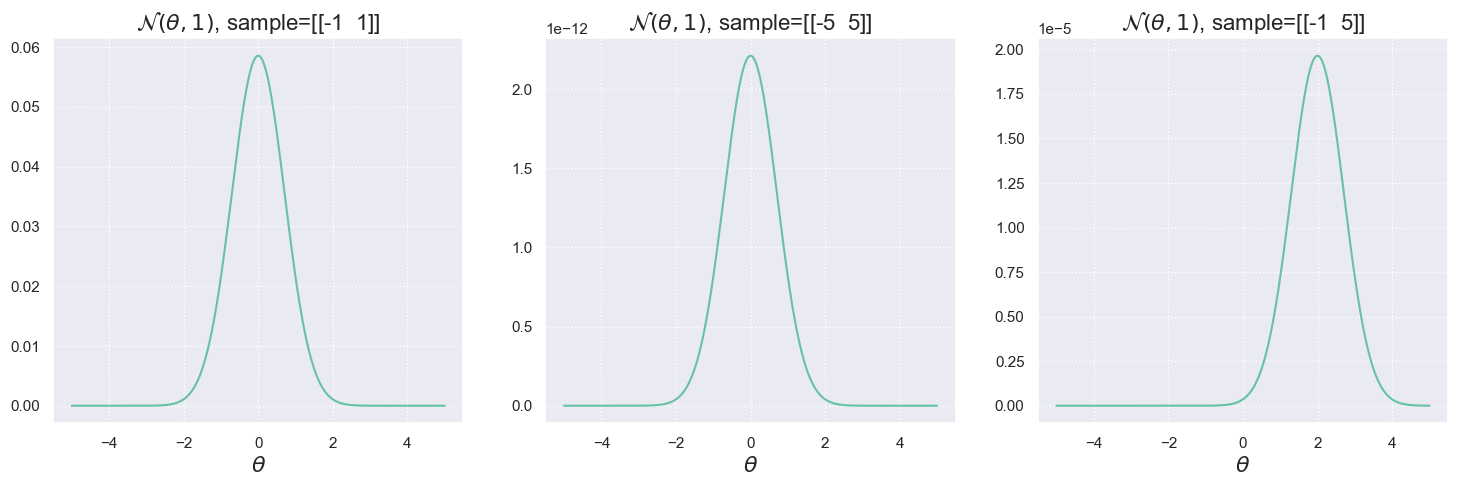

In [35]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid,
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

ФП достигает максимума в выборочном среднем. 

При большем разлёте данных максимум ФП становится меньше.

Выполните остальные:

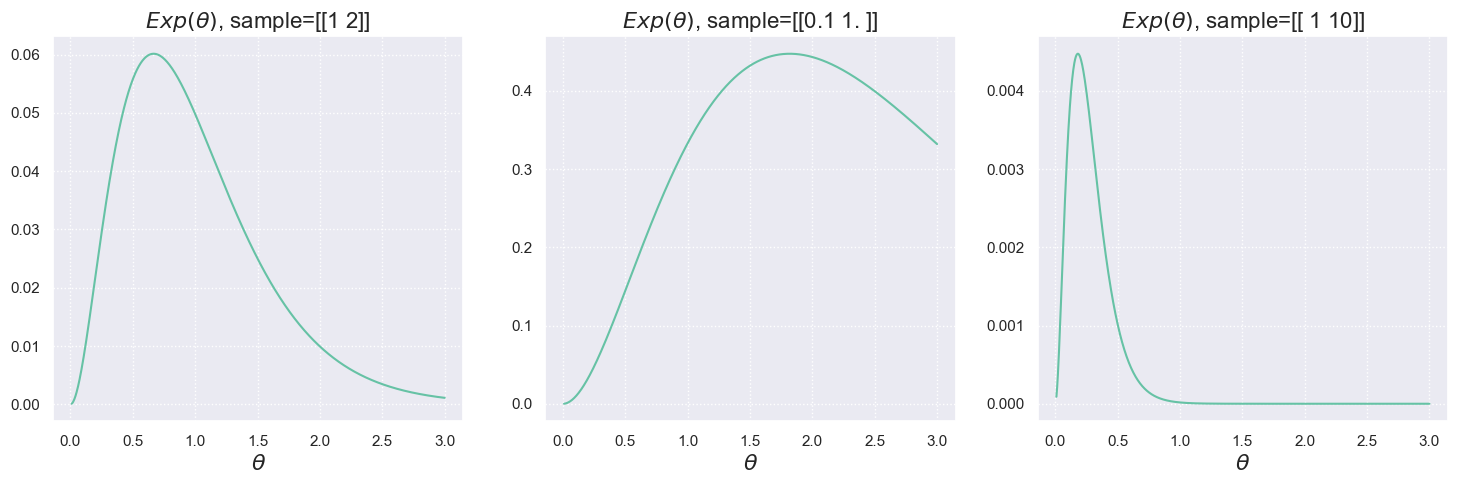

In [40]:
grid = np.linspace(0.01, 3, 1000).reshape((-1, 1))
draw_likelihood(
    sps.expon(scale=1 / grid).pdf, grid, [[1, 2], [0.1, 1], [1, 10]], "$Exp(\\theta)$"
)

ФП уменьшается с ростом $\theta$

ФП достигает максимума при минимальном $\theta$. 

Большие данные смещают ФП влево.

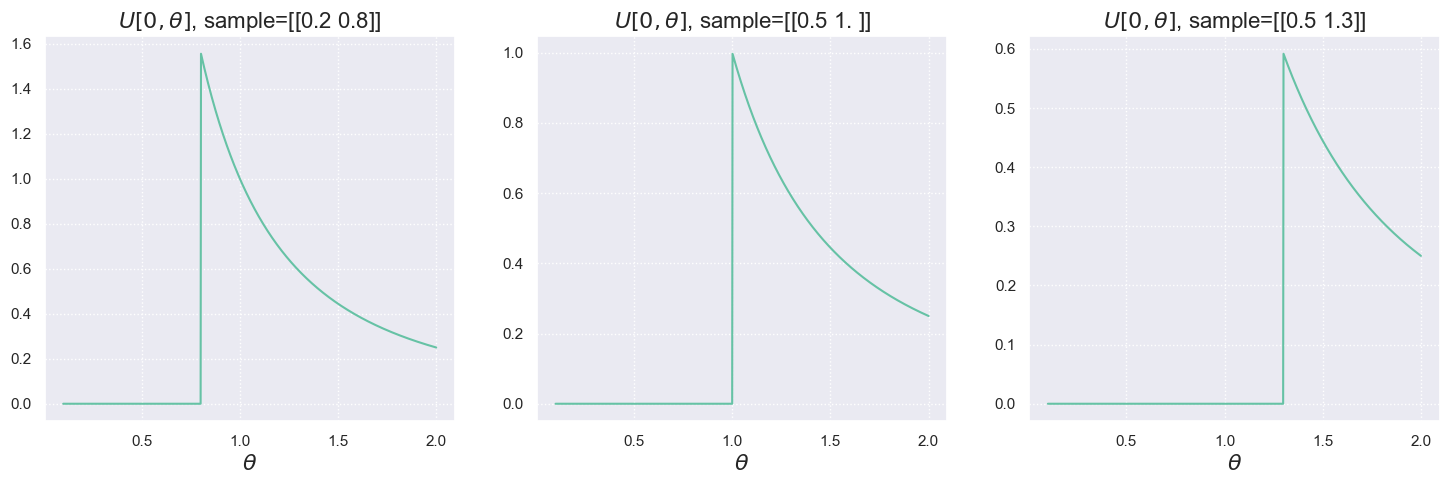

In [41]:
grid = np.linspace(0.1, 2, 1000).reshape((-1, 1))
draw_likelihood(
    lambda x: sps.uniform(loc=0, scale=grid).pdf(x),
    grid,
    [[0.2, 0.8], [0.5, 1], [0.5, 1.3]],
    "$U[0, \\theta]$",
)

ФП зануляется везде, вплоть до $\theta = max$

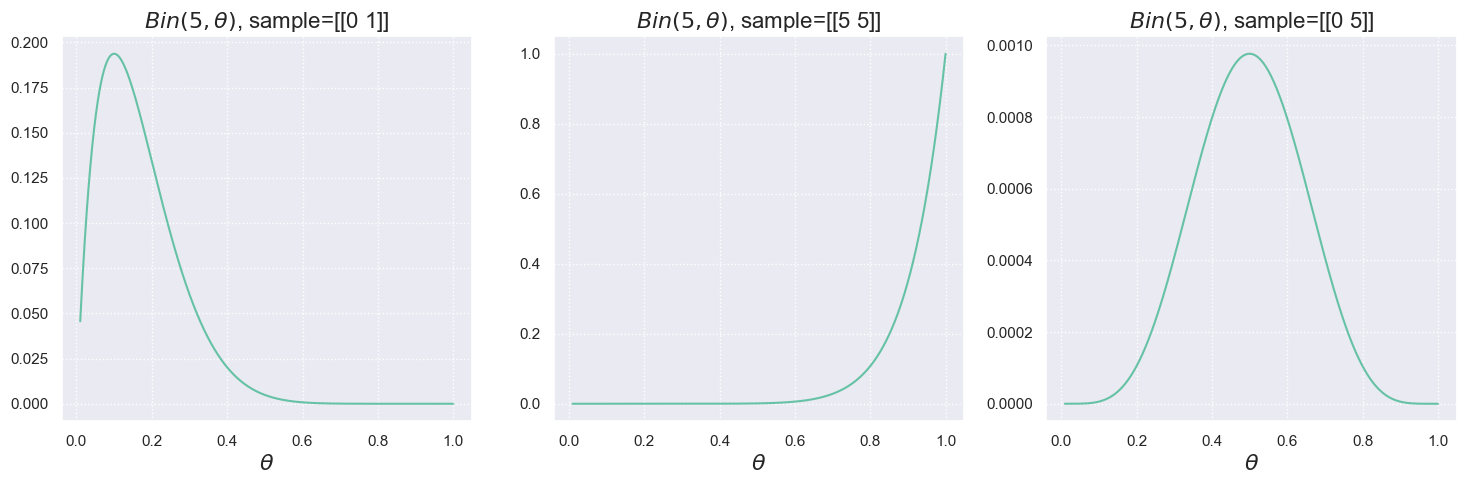

In [42]:
grid = np.linspace(0.01, 1, 1000).reshape((-1, 1))
draw_likelihood(
    sps.binom(n=5, p=grid).pmf, grid, [[0, 1], [5, 5], [0, 5]], "$Bin(5, \\theta)$"
)

Максимум ФП находится в точке, отвечающей выборочной оценке вероятности успеха

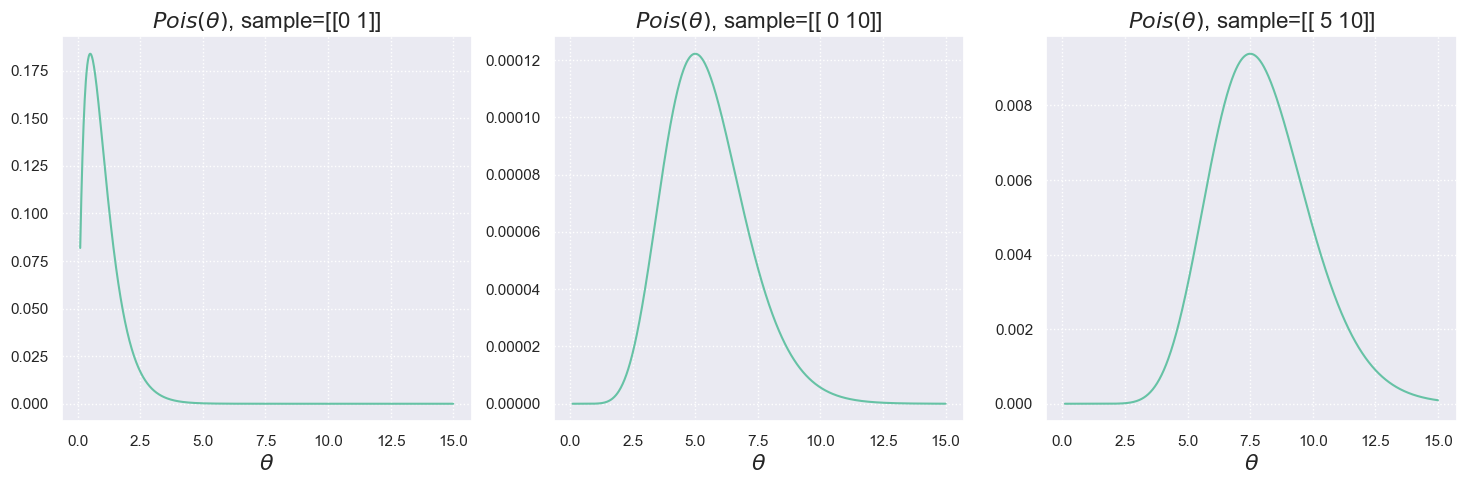

In [43]:
grid = np.linspace(0.1, 15, 1000).reshape((-1, 1))
draw_likelihood(
    sps.poisson(mu=grid).pmf, grid, [[0, 1], [0, 10], [5, 10]], "$Pois(\\theta)$"
)

Максимум ФП находится в точке выборочного среднего

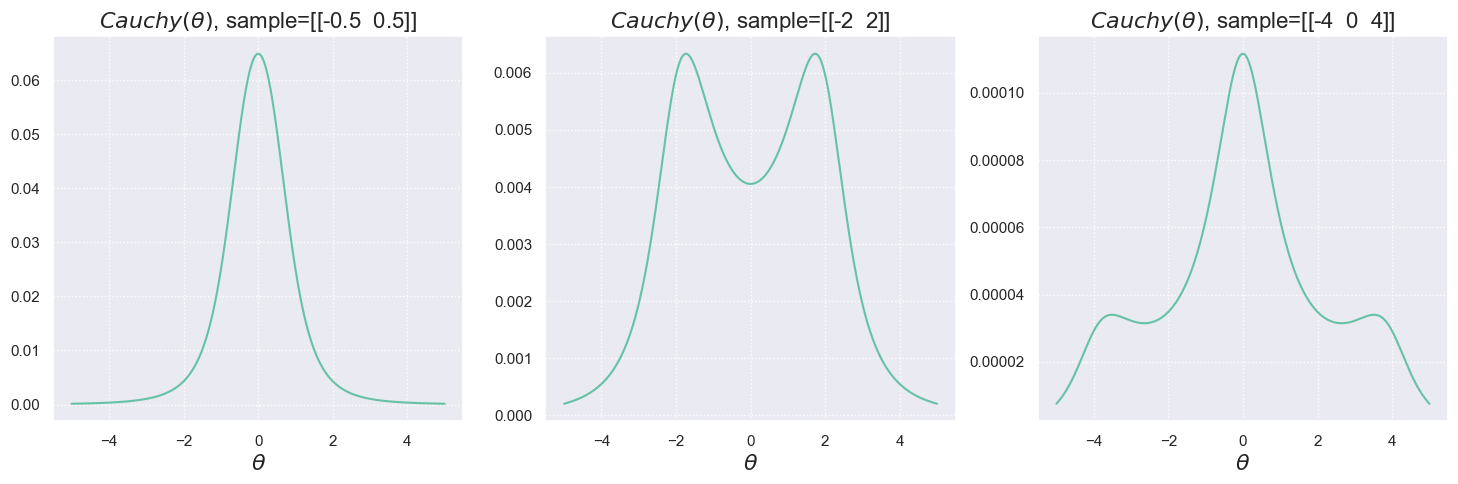

In [44]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(
    sps.cauchy(loc=grid).pdf,
    grid,
    [[-0.5, 0.5], [-2, 2], [-4, 0, 4]],
    "$Сauchy(\\theta)$",
)

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

*Примечание:* В выводе для каждой модели требуется описать, как меняются значения функции (сдвиг, масштаб, форма) при изменении выборки, где достигается максимум, а также какие значения параметра более правдоподобны для данной выборки, какие — менее.

**Вывод:**

Нет, ФП не является плотностью хотя бы потому, что она не нормированна

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [37]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:**


Так произошло из того, что нам не хватило точности. Можно свести задачу умножения кучи чисел к их сложению путём взятия логарифма от произведения и получить сумму логарифмов

In [39]:
sps.norm.logpdf(sample).sum()

-141633.8211150276